<a href="https://colab.research.google.com/github/aglucaci/Bioinformatics-For-All/blob/master/Bioinformatics_For_All_Paper_review_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This article : https://royalsocietypublishing.org/doi/10.1098/rsos.220810#d1e1349


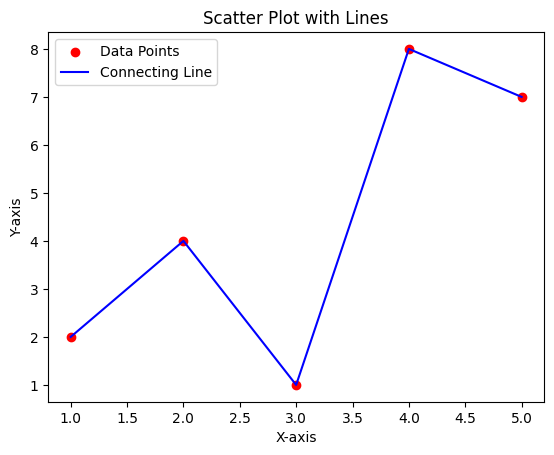

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 8, 7]

# Create the scatter plot
plt.scatter(x, y, color='red', label='Data Points')

# Add lines connecting the points
plt.plot(x, y, color='blue', label='Connecting Line')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Lines')

# Display legend
plt.legend()

# Show the plot
plt.show()


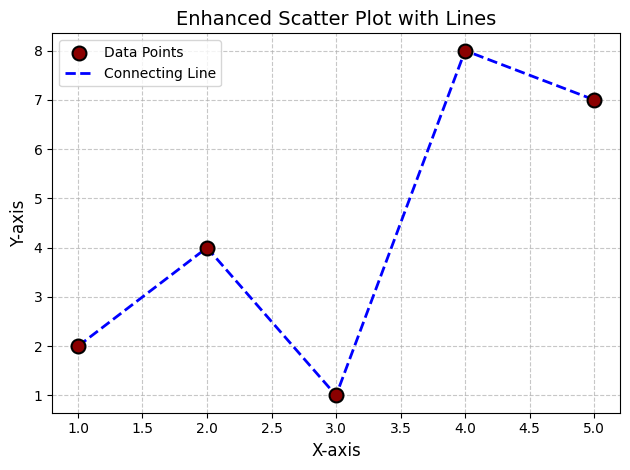

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 8, 7]

# Create the scatter plot with larger markers and different style
plt.scatter(x, y, color='darkred', s=100, edgecolor='black', linewidth=1.5, label='Data Points', zorder=5)

# Add lines connecting the points with a smoother style
plt.plot(x, y, color='blue', linestyle='--', linewidth=2, label='Connecting Line', zorder=3)

# Add labels and title with improved font size
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)
plt.title('Enhanced Scatter Plot with Lines', fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display legend with a higher z-order to be on top
plt.legend(loc='best', fontsize=10, frameon=True)

# Show the plot
plt.tight_layout()
plt.show()


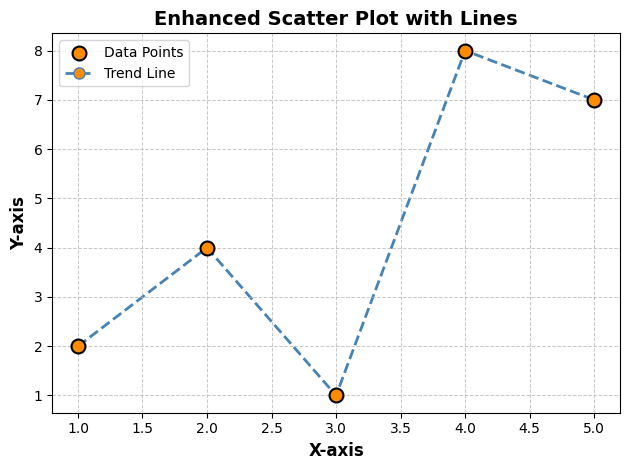

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 8, 7]

# Create the scatter plot
plt.scatter(x, y, color='darkorange', s=100, edgecolor='black', linewidth=1.5, label='Data Points', zorder=2)

# Add lines connecting the points
plt.plot(x, y, color='steelblue', linestyle='--', linewidth=2, marker='o', markerfacecolor='darkorange', markersize=8, label='Trend Line', zorder=1)

# Add labels and title
plt.xlabel('X-axis', fontsize=12, fontweight='bold')
plt.ylabel('Y-axis', fontsize=12, fontweight='bold')
plt.title('Enhanced Scatter Plot with Lines', fontsize=14, fontweight='bold')

# Add grid with customization
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Display legend
plt.legend(loc='best', fontsize=10)

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()


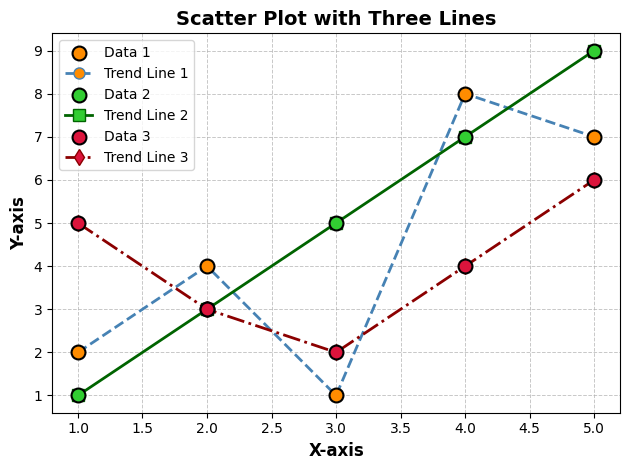

In [ ]:
import matplotlib.pyplot as plt

# Sample data for three lines
x = [1, 2, 3, 4, 5]
y1 = [2, 4, 1, 8, 7]   # First dataset
y2 = [1, 3, 5, 7, 9]   # Second dataset
y3 = [5, 3, 2, 4, 6]   # Third dataset

# Create scatter plot with lines
plt.scatter(x, y1, color='darkorange', s=100, edgecolor='black', linewidth=1.5, label='Data 1', zorder=3)
plt.plot(x, y1, color='steelblue', linestyle='--', linewidth=2, marker='o', markerfacecolor='darkorange', markersize=8, label='Trend Line 1', zorder=2)

plt.scatter(x, y2, color='limegreen', s=100, edgecolor='black', linewidth=1.5, label='Data 2', zorder=3)
plt.plot(x, y2, color='darkgreen', linestyle='-', linewidth=2, marker='s', markerfacecolor='limegreen', markersize=8, label='Trend Line 2', zorder=2)

plt.scatter(x, y3, color='crimson', s=100, edgecolor='black', linewidth=1.5, label='Data 3', zorder=3)
plt.plot(x, y3, color='darkred', linestyle='-.', linewidth=2, marker='d', markerfacecolor='crimson', markersize=8, label='Trend Line 3', zorder=2)

# Add labels and title
plt.xlabel('X-axis', fontsize=12, fontweight='bold')
plt.ylabel('Y-axis', fontsize=12, fontweight='bold')
plt.title('Scatter Plot with Three Lines', fontsize=14, fontweight='bold')

# Add grid with customization
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Display legend
plt.legend(loc='best', fontsize=10)

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()


# PCA

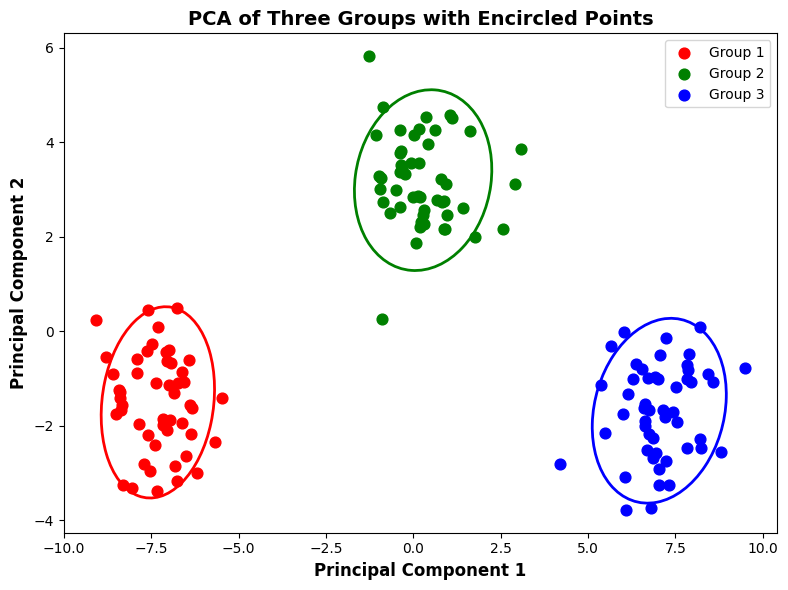

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

# Generate sample data for three groups (3 features)
np.random.seed(42)
group1 = np.random.multivariate_normal([5, 5, 5], np.eye(3), size=50)
group2 = np.random.multivariate_normal([10, 10, 10], np.eye(3), size=50)
group3 = np.random.multivariate_normal([15, 5, 15], np.eye(3), size=50)

# Combine all groups into a single dataset
X = np.vstack([group1, group2, group3])
y = np.array([0]*50 + [1]*50 + [2]*50)  # Labels for the groups

# Perform PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Define a function to draw an ellipse around the data points
def draw_ellipse(ax, x, y, color):
    cov = np.cov(x, y)
    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_)
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                  width=lambda_[0]*4, height=lambda_[1]*4,
                  angle=np.rad2deg(np.arccos(v[0, 0])),
                  edgecolor=color, facecolor='none', linewidth=2)
    ax.add_patch(ell)

# Create the scatter plot with ellipses
fig, ax = plt.subplots(figsize=(8, 6))

# Plot points for each group and encircle them
colors = ['red', 'green', 'blue']
labels = ['Group 1', 'Group 2', 'Group 3']
for i, color in enumerate(colors):
    group_indices = np.where(y == i)
    ax.scatter(X_pca[group_indices, 0], X_pca[group_indices, 1], c=color, label=labels[i], s=60)
    draw_ellipse(ax, X_pca[group_indices, 0], X_pca[group_indices, 1], color)

# Add labels and title
ax.set_xlabel('Principal Component 1', fontsize=12, fontweight='bold')
ax.set_ylabel('Principal Component 2', fontsize=12, fontweight='bold')
ax.set_title('PCA of Three Groups with Encircled Points', fontsize=14, fontweight='bold')

# Add legend
ax.legend(loc='best', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


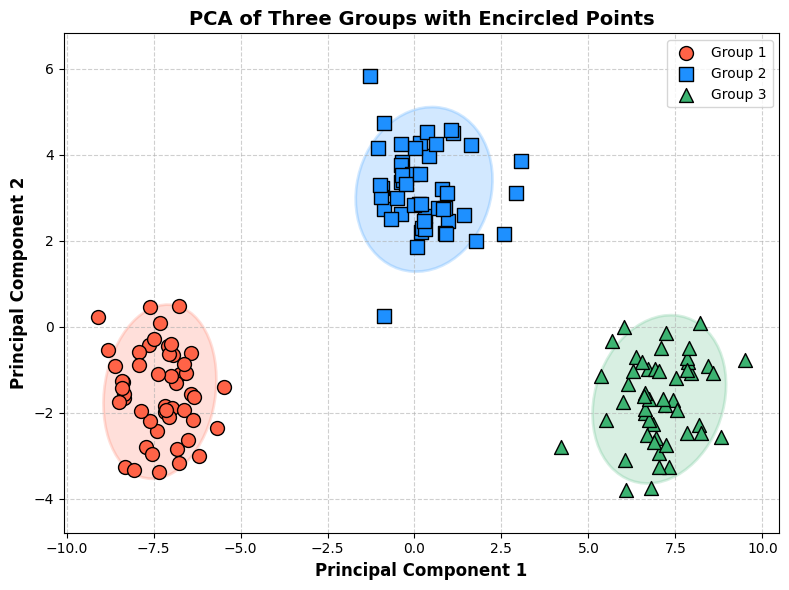

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

# Generate sample data for three groups (3 features)
np.random.seed(42)
group1 = np.random.multivariate_normal([5, 5, 5], np.eye(3), size=50)
group2 = np.random.multivariate_normal([10, 10, 10], np.eye(3), size=50)
group3 = np.random.multivariate_normal([15, 5, 15], np.eye(3), size=50)

# Combine all groups into a single dataset
X = np.vstack([group1, group2, group3])
y = np.array([0]*50 + [1]*50 + [2]*50)  # Labels for the groups

# Perform PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Define a function to draw an ellipse around the data points
def draw_ellipse(ax, x, y, color, alpha=0.2):
    cov = np.cov(x, y)
    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_)
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                  width=lambda_[0]*4, height=lambda_[1]*4,
                  angle=np.rad2deg(np.arccos(v[0, 0])),
                  edgecolor=color, facecolor=color, linewidth=2, alpha=alpha)
    ax.add_patch(ell)

# Create the scatter plot with ellipses
fig, ax = plt.subplots(figsize=(8, 6))

# Plot points for each group and encircle them
colors = ['tomato', 'dodgerblue', 'mediumseagreen']
labels = ['Group 1', 'Group 2', 'Group 3']
markers = ['o', 's', '^']
for i, color in enumerate(colors):
    group_indices = np.where(y == i)
    ax.scatter(X_pca[group_indices, 0], X_pca[group_indices, 1], c=color,
               label=labels[i], s=100, marker=markers[i], edgecolor='black', zorder=3)
    draw_ellipse(ax, X_pca[group_indices, 0], X_pca[group_indices, 1], color)

# Add labels and title
ax.set_xlabel('Principal Component 1', fontsize=12, fontweight='bold')
ax.set_ylabel('Principal Component 2', fontsize=12, fontweight='bold')
ax.set_title('PCA of Three Groups with Encircled Points', fontsize=14, fontweight='bold')

# Add grid with transparency
ax.grid(True, which='both', linestyle='--', alpha=0.6)

# Adjust axis limits for better visualization
ax.set_xlim(min(X_pca[:, 0])-1, max(X_pca[:, 0])+1)
ax.set_ylim(min(X_pca[:, 1])-1, max(X_pca[:, 1])+1)

# Add legend
ax.legend(loc='best', fontsize=10, frameon=True)

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()


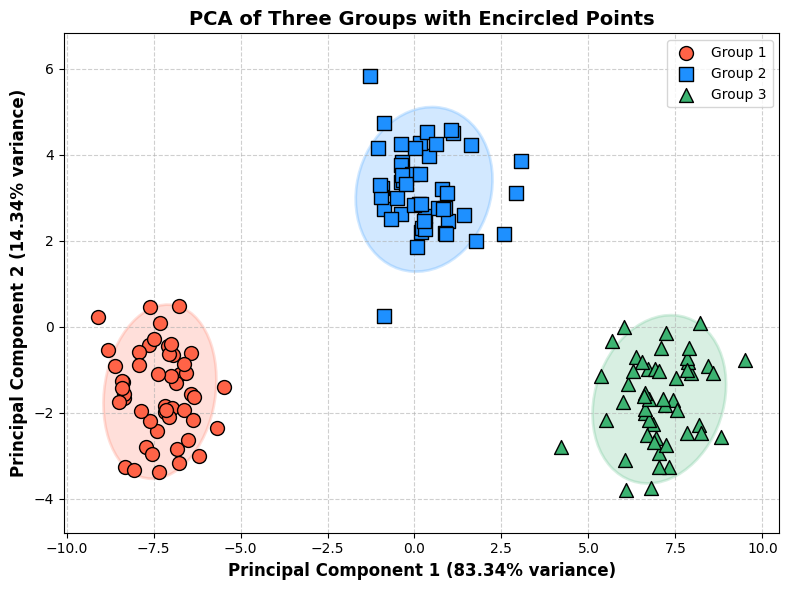

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

# Generate sample data for three groups (3 features)
np.random.seed(42)
group1 = np.random.multivariate_normal([5, 5, 5], np.eye(3), size=50)
group2 = np.random.multivariate_normal([10, 10, 10], np.eye(3), size=50)
group3 = np.random.multivariate_normal([15, 5, 15], np.eye(3), size=50)

# Combine all groups into a single dataset
X = np.vstack([group1, group2, group3])
y = np.array([0]*50 + [1]*50 + [2]*50)  # Labels for the groups

# Perform PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Get the explained variance ratios for PC1 and PC2
explained_variance = pca.explained_variance_ratio_

# Define a function to draw an ellipse around the data points
def draw_ellipse(ax, x, y, color, alpha=0.2):
    cov = np.cov(x, y)
    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_)
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                  width=lambda_[0]*4, height=lambda_[1]*4,
                  angle=np.rad2deg(np.arccos(v[0, 0])),
                  edgecolor=color, facecolor=color, linewidth=2, alpha=alpha)
    ax.add_patch(ell)

# Create the scatter plot with ellipses
fig, ax = plt.subplots(figsize=(8, 6))

# Plot points for each group and encircle them
colors = ['tomato', 'dodgerblue', 'mediumseagreen']
labels = ['Group 1', 'Group 2', 'Group 3']
markers = ['o', 's', '^']
for i, color in enumerate(colors):
    group_indices = np.where(y == i)
    ax.scatter(X_pca[group_indices, 0], X_pca[group_indices, 1], c=color,
               label=labels[i], s=100, marker=markers[i], edgecolor='black', zorder=3)
    draw_ellipse(ax, X_pca[group_indices, 0], X_pca[group_indices, 1], color)

# Add labels with explained variance percentages
ax.set_xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}% variance)', fontsize=12, fontweight='bold')
ax.set_ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}% variance)', fontsize=12, fontweight='bold')
ax.set_title('PCA of Three Groups with Encircled Points', fontsize=14, fontweight='bold')

# Add grid with transparency
ax.grid(True, which='both', linestyle='--', alpha=0.6)

# Adjust axis limits for better visualization
ax.set_xlim(min(X_pca[:, 0])-1, max(X_pca[:, 0])+1)
ax.set_ylim(min(X_pca[:, 1])-1, max(X_pca[:, 1])+1)

# Add legend
ax.legend(loc='best', fontsize=10, frameon=True)

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()


# Heatmap with Dendrogram

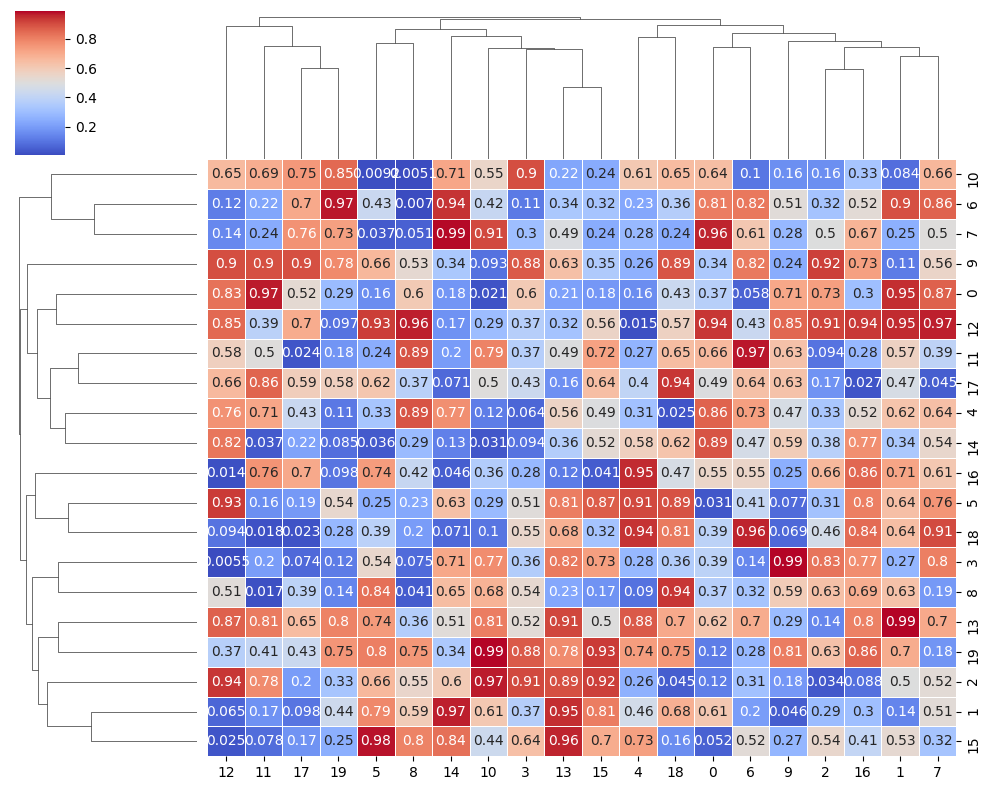

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Generate sample data for 20 items (20x20 matrix)
np.random.seed(42)
data = np.random.rand(20, 20)

# Perform hierarchical clustering on rows and columns
row_linkage = linkage(data, method='average')
col_linkage = linkage(data.T, method='average')

# Create the heatmap with dendrogram
sns.clustermap(data, row_linkage=row_linkage, col_linkage=col_linkage,
               cmap='coolwarm', linewidths=0.5, figsize=(10, 8), annot=True)

# Show the plot
plt.show()


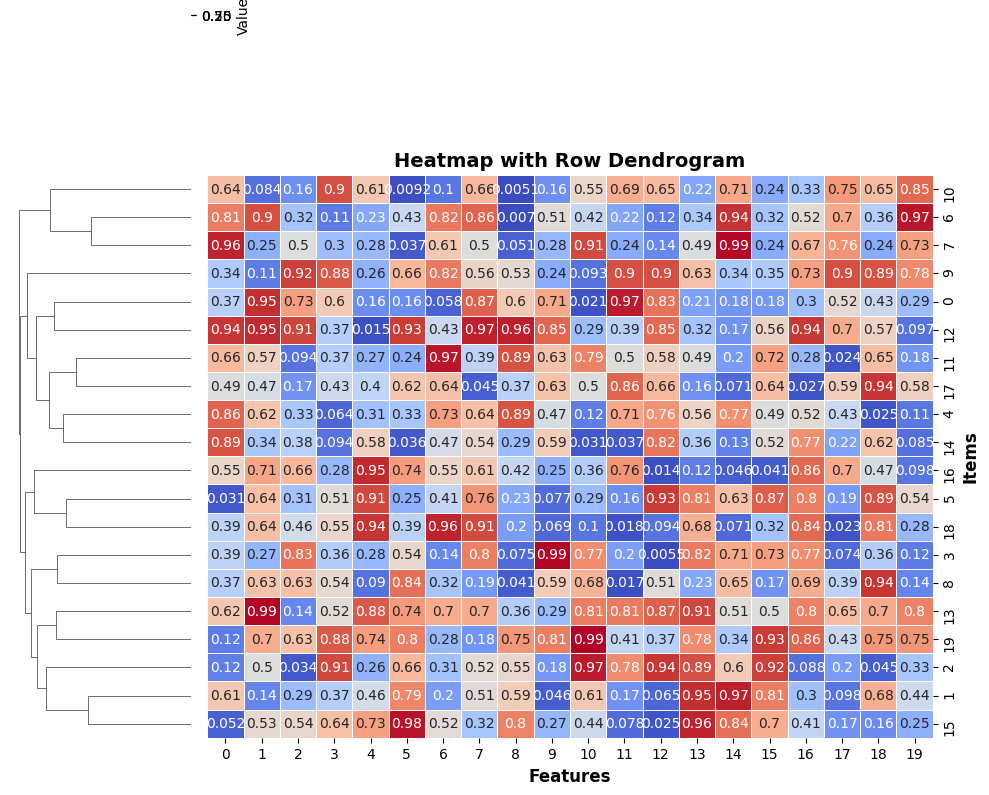

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

# Generate sample data for 20 items (20x20 matrix)
np.random.seed(42)
data = np.random.rand(20, 20)

# Perform hierarchical clustering on rows only
row_linkage = linkage(data, method='average')

# Create the heatmap with a row dendrogram and no column dendrogram
g = sns.clustermap(data, row_linkage=row_linkage, col_cluster=False,
                   cmap='coolwarm', linewidths=0.5, figsize=(10, 8), annot=True,
                   cbar_kws={'label': 'Value'}, dendrogram_ratio=(0.2, 0))

# Customize the plot further
g.ax_heatmap.set_title('Heatmap with Row Dendrogram', fontsize=14, fontweight='bold')
g.ax_heatmap.set_xlabel('Features', fontsize=12, fontweight='bold')
g.ax_heatmap.set_ylabel('Items', fontsize=12, fontweight='bold')

# Adjust the layout to make sure everything fits
plt.tight_layout()

# Show the plot
plt.show()


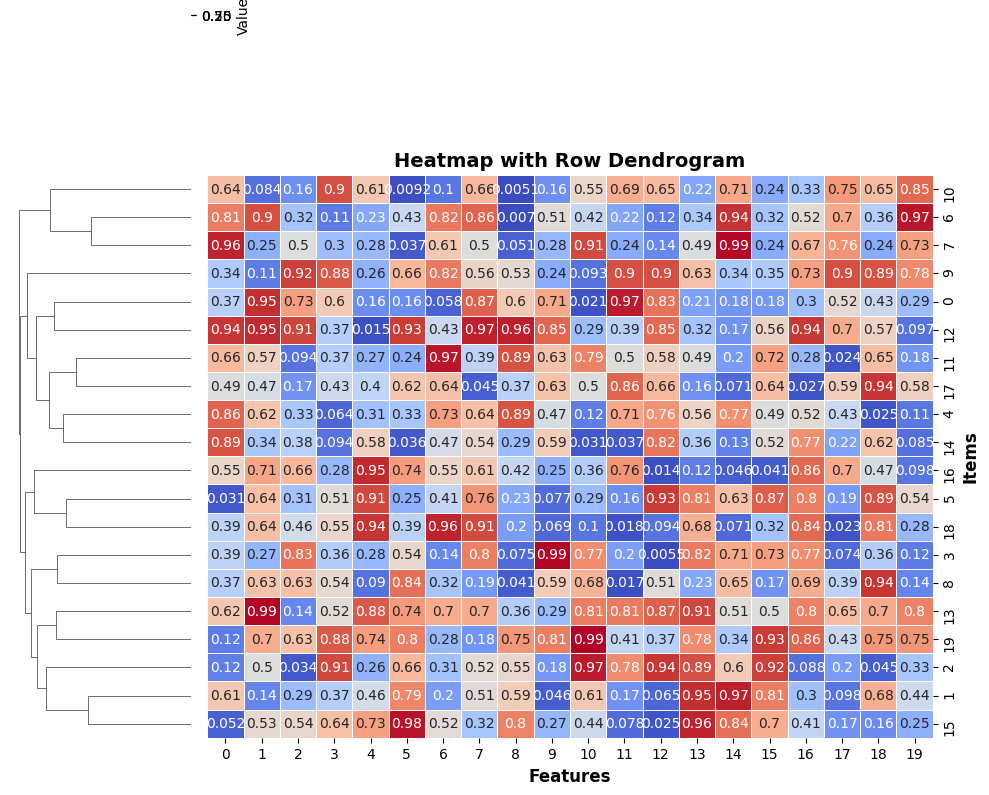

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Generate sample data for 20 items (20x20 matrix)
np.random.seed(42)
data = np.random.rand(20, 20)

# Perform hierarchical clustering on rows only
row_linkage = linkage(data, method='average')

# Create the heatmap with a row dendrogram and no column dendrogram
g = sns.clustermap(data, row_linkage=row_linkage, col_cluster=False,
                   cmap='coolwarm', linewidths=0.5, figsize=(10, 8), annot=True,
                   cbar_kws={'label': 'Value'}, dendrogram_ratio=(0.2, 0))

# Darken the side dendrogram lines
dendro_ax = g.ax_row_dendrogram
dendro_lines = dendro_ax.get_lines()

for line in dendro_lines:
    line.set_color('black')  # Set the color to black (or darker)
    line.set_linewidth(2)    # Increase the line width to make it thicker

# Customize the plot further
g.ax_heatmap.set_title('Heatmap with Row Dendrogram', fontsize=14, fontweight='bold')
g.ax_heatmap.set_xlabel('Features', fontsize=12, fontweight='bold')
g.ax_heatmap.set_ylabel('Items', fontsize=12, fontweight='bold')

# Adjust the layout to make sure everything fits
plt.tight_layout()

# Show the plot
plt.show()


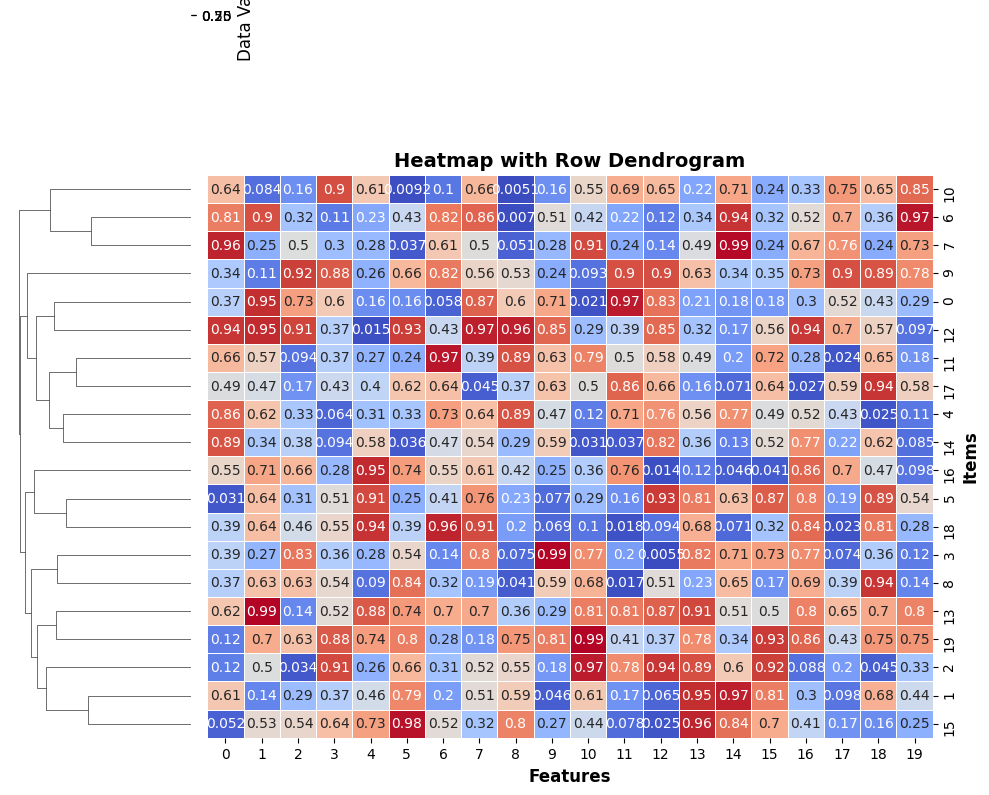

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

# Generate sample data for 20 items (20x20 matrix)
np.random.seed(42)
data = np.random.rand(20, 20)

# Perform hierarchical clustering on rows only
row_linkage = linkage(data, method='average')

# Create the heatmap with a row dendrogram and no column dendrogram
g = sns.clustermap(data, row_linkage=row_linkage, col_cluster=False,
                   cmap='coolwarm', linewidths=0.5, figsize=(10, 8), annot=True,
                   cbar_kws={'label': 'Value'}, dendrogram_ratio=(0.2, 0))

# Darken the side dendrogram lines
dendro_ax = g.ax_row_dendrogram
dendro_lines = dendro_ax.get_lines()

for line in dendro_lines:
    line.set_color('black')  # Set the color to black (or darker)
    line.set_linewidth(2)    # Increase the line width to make it thicker

# Customize the plot further
g.ax_heatmap.set_title('Heatmap with Row Dendrogram', fontsize=14, fontweight='bold')
g.ax_heatmap.set_xlabel('Features', fontsize=12, fontweight='bold')
g.ax_heatmap.set_ylabel('Items', fontsize=12, fontweight='bold')

# Customize color bar (legend)
colorbar = g.ax_heatmap.collections[0].colorbar
colorbar.set_label('Data Value', fontsize=12)
colorbar.ax.tick_params(labelsize=10)

# Adjust the layout to make sure everything fits
plt.tight_layout()

# Show the plot
plt.show()


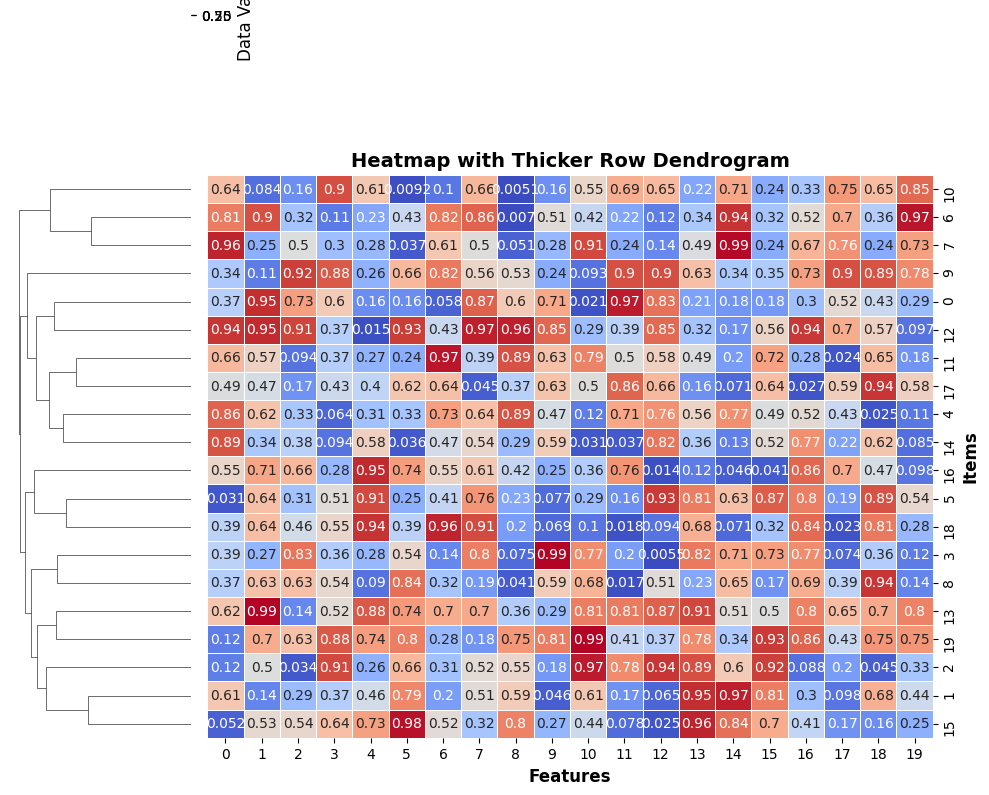

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

# Generate sample data for 20 items (20x20 matrix)
np.random.seed(42)
data = np.random.rand(20, 20)

# Perform hierarchical clustering on rows only
row_linkage = linkage(data, method='average')

# Create the heatmap with a row dendrogram and no column dendrogram
g = sns.clustermap(data, row_linkage=row_linkage, col_cluster=False,
                   cmap='coolwarm', linewidths=0.5, figsize=(10, 8), annot=True,
                   cbar_kws={'label': 'Value'}, dendrogram_ratio=(0.2, 0))

# Darken and thicken the side dendrogram lines
dendro_ax = g.ax_row_dendrogram
dendro_lines = dendro_ax.get_lines()

for line in dendro_lines:
    line.set_color('black')  # Set the color to black
    line.set_linewidth(30)    # Increase the line width to make it thicker

# Customize the plot further
g.ax_heatmap.set_title('Heatmap with Thicker Row Dendrogram', fontsize=14, fontweight='bold')
g.ax_heatmap.set_xlabel('Features', fontsize=12, fontweight='bold')
g.ax_heatmap.set_ylabel('Items', fontsize=12, fontweight='bold')

# Customize color bar (legend)
colorbar = g.ax_heatmap.collections[0].colorbar
colorbar.set_label('Data Value', fontsize=12)
colorbar.ax.tick_params(labelsize=10)

# Adjust the layout to make sure everything fits
plt.tight_layout()

# Show the plot
plt.show()


# Box-plot

<ipython-input-14-9fda90d268a9>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition', y='Value', data=data_melted, palette="Set2")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_gr

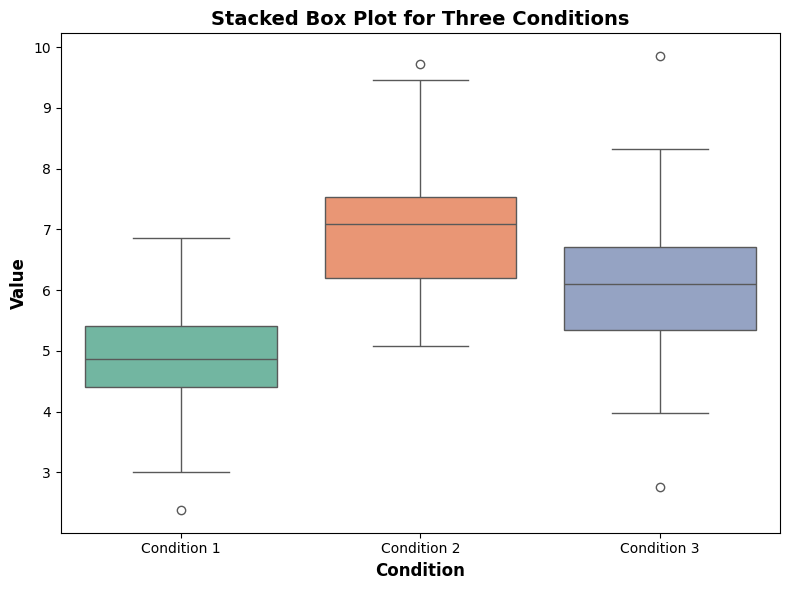

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Generate sample data for three conditions
np.random.seed(42)
condition1 = np.random.normal(loc=5, scale=1, size=100)
condition2 = np.random.normal(loc=7, scale=1, size=100)
condition3 = np.random.normal(loc=6, scale=1, size=100)

# Combine data into a DataFrame for better handling
data = pd.DataFrame({
    'Condition 1': condition1,
    'Condition 2': condition2,
    'Condition 3': condition3
})

# Convert the DataFrame into a long format for seaborn
data_melted = data.melt(var_name='Condition', value_name='Value')

# Create the stacked box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Condition', y='Value', data=data_melted, palette="Set2")

# Customize the plot
plt.title('Stacked Box Plot for Three Conditions', fontsize=14, fontweight='bold')
plt.xlabel('Condition', fontsize=12, fontweight='bold')
plt.ylabel('Value', fontsize=12, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Generate sample data for three conditions and two variables per condition
np.random.seed(42)
condition1_var1 = np.random.normal(loc=5, scale=1, size=100)
condition1_var2 = np.random.normal(loc=5.5, scale=1, size=100)

condition2_var1 = np.random.normal(loc=7, scale=1, size=100)
condition2_var2 = np.random.normal(loc=7.5, scale=1, size=100)

condition3_var1 = np.random.normal(loc=6, scale=1, size=100)
condition3_var2 = np.random.normal(loc=6.5, scale=1, size=100)

# Status groups for faceting
status = np.random.choice(['Status 1', 'Status 2', 'Status 3'], size=100)

# Combine data into a DataFrame for better handling
data = pd.DataFrame({
    'Condition': ['Condition 1']*100 + ['Condition 2']*100 + ['Condition 3']*100,
    'Variable': ['Var 1']*50 + ['Var 2']*50 + ['Var 1']*50 + ['Var 2']*50 + ['Var 1']*50 + ['Var 2']*50,
    'Value': np.concatenate([condition1_var1, condition1_var2, condition2_var1, condition2_var2, condition3_var1, condition3_var2]),
    'Status': np.concatenate([status, status, status])
})

# Create the FacetGrid for three different status conditions
g = sns.FacetGrid(data, col='Status', height=5, aspect=1.2)

# Create box plots for each condition and variable within each status group
g.map(sns.boxplot, 'Condition', 'Value', 'Variable', palette="Set2")

# Customize the plot further
g.add_legend(title="Variable")
g.set_axis_labels("Condition", "Value")
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Box Plots for Different Conditions and Variables Faceted by Status', fontsize=16, fontweight='bold')

# Display the plot
plt.show()


ValueError: All arrays must be of the same length

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Generate sample data for three conditions and two variables per condition
np.random.seed(42)
condition1_var1 = np.random.normal(loc=5, scale=1, size=100)
condition1_var2 = np.random.normal(loc=5.5, scale=1, size=100)

condition2_var1 = np.random.normal(loc=7, scale=1, size=100)
condition2_var2 = np.random.normal(loc=7.5, scale=1, size=100)

condition3_var1 = np.random.normal(loc=6, scale=1, size=100)
condition3_var2 = np.random.normal(loc=6.5, scale=1, size=100)

# Status groups for faceting
status = np.random.choice(['Status 1', 'Status 2', 'Status 3'], size=100)

# Combine data into a DataFrame for better handling
data = pd.DataFrame({
    'Condition': ['Condition 1']*100 + ['Condition 2']*100 + ['Condition 3']*100,
    'Variable': ['Var 1']*50 + ['Var 2']*50 + ['Var 1']*50 + ['Var 2']*50 + ['Var 1']*50 + ['Var 2']*50,
    'Value': np.concatenate([condition1_var1, condition1_var2, condition2_var1, condition2_var2, condition3_var1, condition3_var2]),
    'Status': np.concatenate([status, status, status])
})

# Create the FacetGrid for three different status conditions
g = sns.FacetGrid(data, col='Status', height=5, aspect=1.2)

# Create box plots for each condition and variable within each status group
g.map(sns.boxplot, 'Condition', 'Value', 'Variable', palette="Set2")

# Customize the plot further
g.add_legend(title="Variable")
g.set_axis_labels("Condition", "Value")
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Box Plots for Different Conditions and Variables Faceted by Status', fontsize=16, fontweight='bold')

# Display the plot
plt.show()


ValueError: All arrays must be of the same length

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Generate sample data for three conditions and two variables per condition
np.random.seed(42)
condition1_var1 = np.random.normal(loc=5, scale=1, size=100)
condition1_var2 = np.random.normal(loc=5.5, scale=1, size=100)

condition2_var1 = np.random.normal(loc=7, scale=1, size=100)
condition2_var2 = np.random.normal(loc=7.5, scale=1, size=100)

condition3_var1 = np.random.normal(loc=6, scale=1, size=100)
condition3_var2 = np.random.normal(loc=6.5, scale=1, size=100)

# Status groups for faceting (same length as data)
status = np.random.choice(['Status 1', 'Status 2', 'Status 3'], size=300)

# Combine data into a DataFrame for better handling
data = pd.DataFrame({
    'Condition': ['Condition 1']*200 + ['Condition 2']*200 + ['Condition 3']*200,
    'Variable': ['Var 1']*100 + ['Var 2']*100 + ['Var 1']*100 + ['Var 2']*100 + ['Var 1']*100 + ['Var 2']*100,
    'Value': np.concatenate([condition1_var1, condition1_var2, condition2_var1, condition2_var2, condition3_var1, condition3_var2]),
    'Status': status
})

# Create the FacetGrid for three different status conditions
g = sns.FacetGrid(data, col='Status', height=5, aspect=1.2)

# Create box plots for each condition and variable within each status group
g.map(sns.boxplot, 'Condition', 'Value', 'Variable', palette="Set2")

# Customize the plot further
g.add_legend(title="Variable")
g.set_axis_labels("Condition", "Value")
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Box Plots for Different Conditions and Variables Faceted by Status', fontsize=16, fontweight='bold')

# Display the plot
plt.show()


ValueError: All arrays must be of the same length

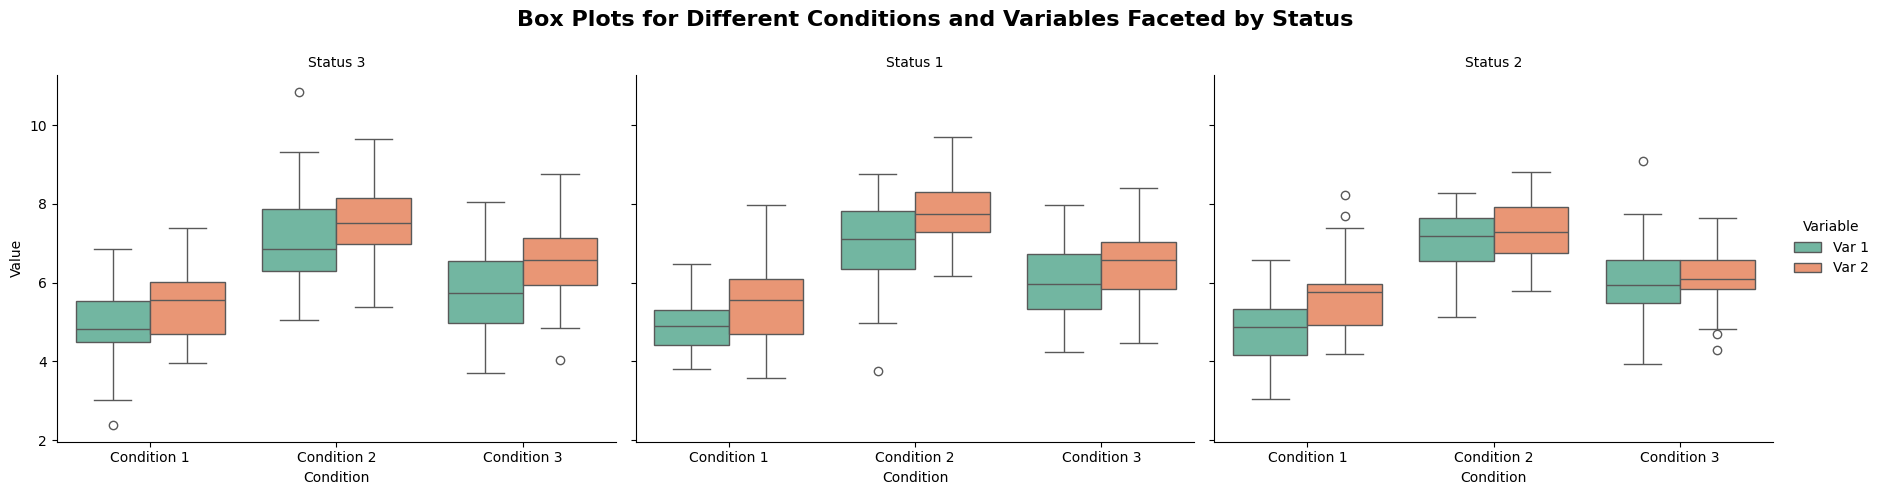

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


# Generate sample data for three conditions and two variables per condition
np.random.seed(42)
condition1_var1 = np.random.normal(loc=5, scale=1, size=100)
condition1_var2 = np.random.normal(loc=5.5, scale=1, size=100)

condition2_var1 = np.random.normal(loc=7, scale=1, size=100)
condition2_var2 = np.random.normal(loc=7.5, scale=1, size=100)

condition3_var1 = np.random.normal(loc=6, scale=1, size=100)
condition3_var2 = np.random.normal(loc=6.5, scale=1, size=100)

# Status groups for faceting
status = np.random.choice(['Status 1', 'Status 2', 'Status 3'], size=300)

# Combine data into a DataFrame for better handling
# Each condition has two variables, so we concatenate them
data = pd.DataFrame({
    'Condition': ['Condition 1']*200 + ['Condition 2']*200 + ['Condition 3']*200,
    'Variable': ['Var 1']*100 + ['Var 2']*100 + ['Var 1']*100 + ['Var 2']*100 + ['Var 1']*100 + ['Var 2']*100,
    'Value': np.concatenate([condition1_var1, condition1_var2, condition2_var1, condition2_var2, condition3_var1, condition3_var2]),
    'Status': np.concatenate([status[:200], status[:200], status[:200]])  # Matching Status length
})

# Create the FacetGrid for three different status conditions
g = sns.FacetGrid(data, col='Status', height=5, aspect=1.2)

# Create box plots for each condition and variable within each status group
g.map(sns.boxplot, 'Condition', 'Value', 'Variable', palette="Set2")

# Customize the plot further
g.add_legend(title="Variable")
g.set_axis_labels("Condition", "Value")
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Box Plots for Different Conditions and Variables Faceted by Status', fontsize=16, fontweight='bold')

# Display the plot
plt.show()


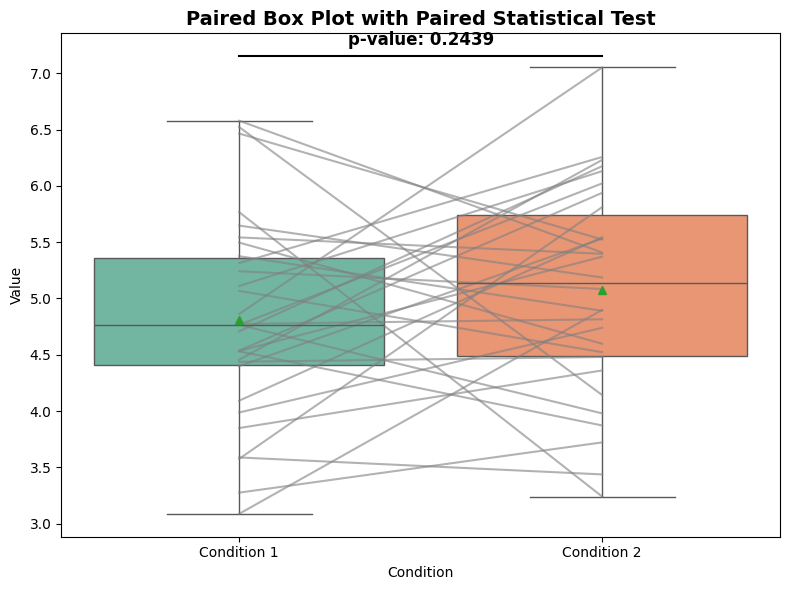

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# Generate sample paired data for two conditions
np.random.seed(42)
condition1 = np.random.normal(loc=5, scale=1, size=30)
condition2 = np.random.normal(loc=5.2, scale=1, size=30)  # Slightly different from condition1

# Create a DataFrame for the paired data
data = pd.DataFrame({
    'Condition 1': condition1,
    'Condition 2': condition2
})

# Melt the DataFrame into a long format for seaborn plotting
data_melted = pd.melt(data.reset_index(), id_vars='index', value_vars=['Condition 1', 'Condition 2'], var_name='Condition', value_name='Value')

# Create the box plot with paired data points
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Condition', y='Value', data=data_melted, palette='Set2', showmeans=True)

# Add paired lines between the points
for i in range(data.shape[0]):
    plt.plot([0, 1], [data.iloc[i, 0], data.iloc[i, 1]], color='gray', linestyle='-', alpha=0.6)

# Perform a paired t-test
stat, pvalue = ttest_rel(condition1, condition2)

# Add the p-value text annotation on the plot
p_text = f'p-value: {pvalue:.4f}'
plt.text(0.5, max(data_melted['Value']) + 0.2, p_text, ha='center', fontsize=12, fontweight='bold')

# Add a line to represent the comparison
plt.plot([0, 1], [max(data_melted['Value']) + 0.1] * 2, lw=1.5, color='black')

# Customize the plot
plt.title('Paired Box Plot with Paired Statistical Test', fontsize=14, fontweight='bold')
plt.tight_layout()

# Show the plot
plt.show()


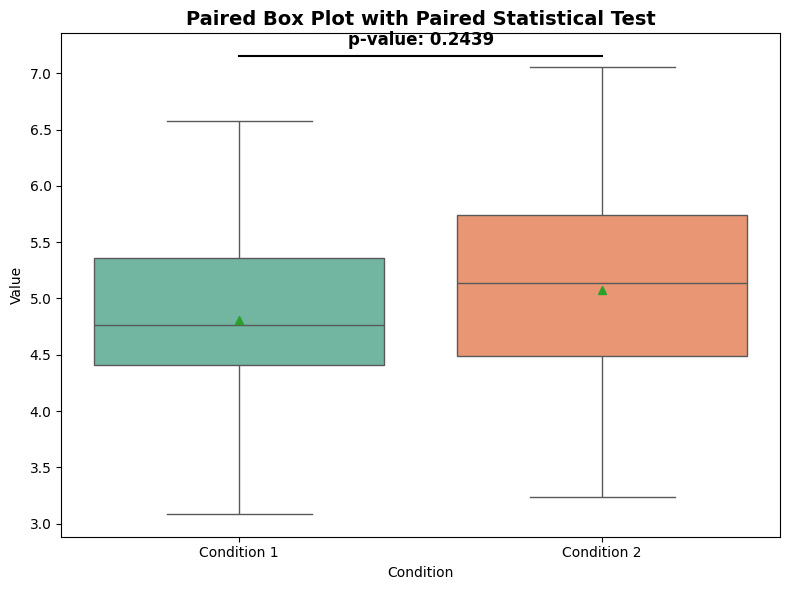

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# Generate sample paired data for two conditions
np.random.seed(42)
condition1 = np.random.normal(loc=5, scale=1, size=30)
condition2 = np.random.normal(loc=5.2, scale=1, size=30)  # Slightly different from condition1

# Create a DataFrame for the paired data
data = pd.DataFrame({
    'Condition 1': condition1,
    'Condition 2': condition2
})

# Melt the DataFrame into a long format for seaborn plotting
data_melted = pd.melt(data.reset_index(), id_vars='index', value_vars=['Condition 1', 'Condition 2'], var_name='Condition', value_name='Value')

# Create the box plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Condition', y='Value', data=data_melted, palette='Set2', showmeans=True)

# Perform a paired t-test
stat, pvalue = ttest_rel(condition1, condition2)

# Add the p-value text annotation on the plot
p_text = f'p-value: {pvalue:.4f}'
plt.text(0.5, max(data_melted['Value']) + 0.2, p_text, ha='center', fontsize=12, fontweight='bold')

# Add a line to represent the statistical comparison
plt.plot([0, 1], [max(data_melted['Value']) + 0.1] * 2, lw=1.5, color='black')

# Customize the plot
plt.title('Paired Box Plot with Paired Statistical Test', fontsize=14, fontweight='bold')
plt.tight_layout()

# Show the plot
plt.show()


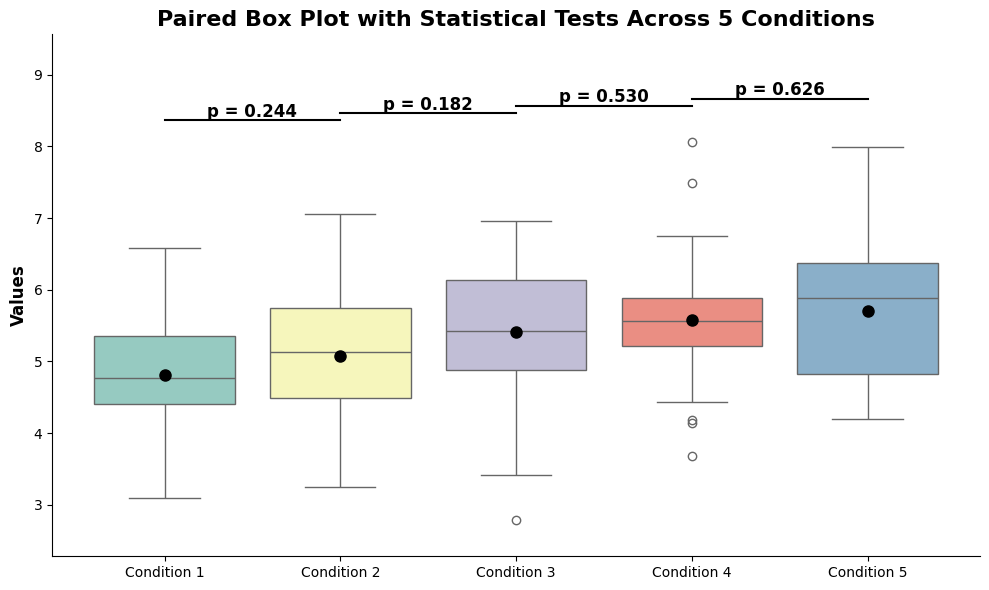

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# Generate sample paired data for five conditions
np.random.seed(42)
condition1 = np.random.normal(loc=5, scale=1, size=30)
condition2 = np.random.normal(loc=5.2, scale=1, size=30)
condition3 = np.random.normal(loc=5.4, scale=1, size=30)
condition4 = np.random.normal(loc=5.6, scale=1, size=30)
condition5 = np.random.normal(loc=5.8, scale=1, size=30)

# Create a DataFrame for the paired data
data = pd.DataFrame({
    'Condition 1': condition1,
    'Condition 2': condition2,
    'Condition 3': condition3,
    'Condition 4': condition4,
    'Condition 5': condition5
})

# Melt the DataFrame into a long format for seaborn plotting
data_melted = pd.melt(data.reset_index(), id_vars='index', value_vars=['Condition 1', 'Condition 2', 'Condition 3', 'Condition 4', 'Condition 5'],
                      var_name='Condition', value_name='Value')

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create the box plot
ax = sns.boxplot(x='Condition', y='Value', data=data_melted, palette='Set3', showmeans=True,
                 meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black", "markersize": 8})

# Perform paired t-tests and annotate p-values
conditions = [condition1, condition2, condition3, condition4, condition5]
num_conditions = len(conditions)

# Loop through condition pairs and perform paired t-tests
y_max = max(data_melted['Value'])
for i in range(num_conditions - 1):
    stat, pvalue = ttest_rel(conditions[i], conditions[i+1])

    # Formatting the p-value text
    if pvalue < 0.001:
        p_text = 'p < 0.001'
    else:
        p_text = f'p = {pvalue:.3f}'

    # Add p-value text annotation slightly above the box plot
    x1, x2 = i, i + 1
    y = y_max + 0.3 + (i * 0.1)  # Stagger the p-value annotations to avoid overlap
    plt.plot([x1, x2], [y, y], lw=1.5, color='black')
    plt.text((x1 + x2) * 0.5, y + 0.05, p_text, ha='center', fontsize=12, fontweight='bold')

# Set the y-axis limit slightly higher for better spacing
plt.ylim(min(data_melted['Value']) - 0.5, y_max + 1.5)

# Customize the plot's appearance
plt.title('Paired Box Plot with Statistical Tests Across 5 Conditions', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Values', fontsize=12, fontweight='bold')

# Remove top and right spines for cleaner look
sns.despine()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


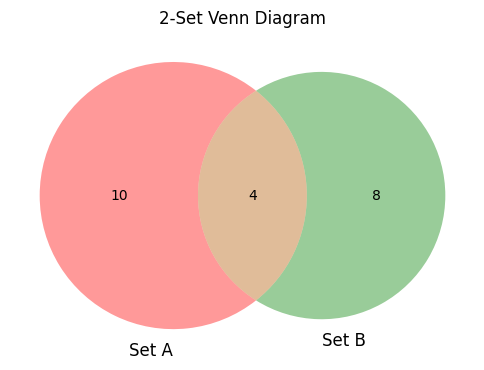

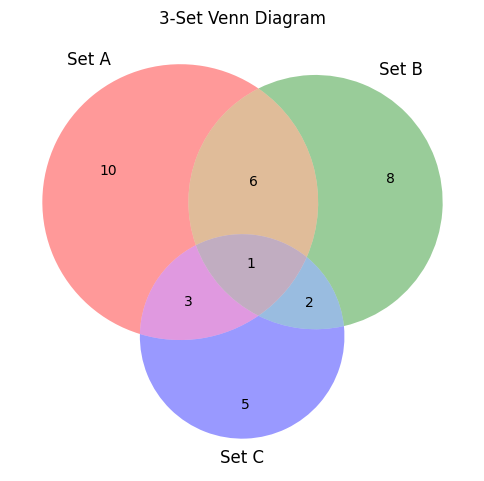

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

# Example of 2-set Venn Diagram
plt.figure(figsize=(6, 6))
venn2(subsets=(10, 8, 4), set_labels=('Set A', 'Set B'))
plt.title("2-Set Venn Diagram")
plt.show()

# Example of 3-set Venn Diagram
plt.figure(figsize=(6, 6))
venn3(subsets=(10, 8, 6, 5, 3, 2, 1), set_labels=('Set A', 'Set B', 'Set C'))
plt.title("3-Set Venn Diagram")
plt.show()


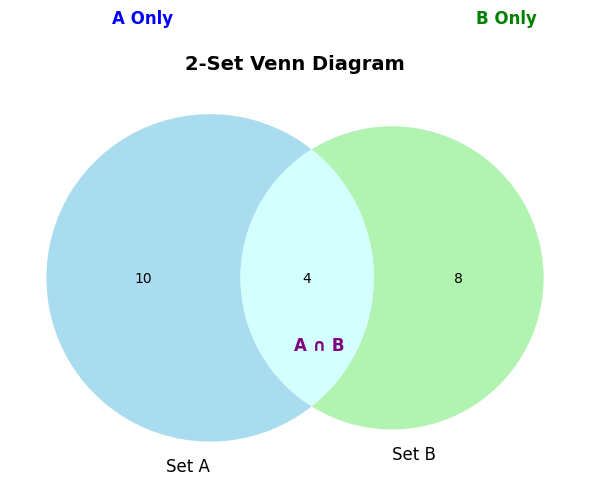

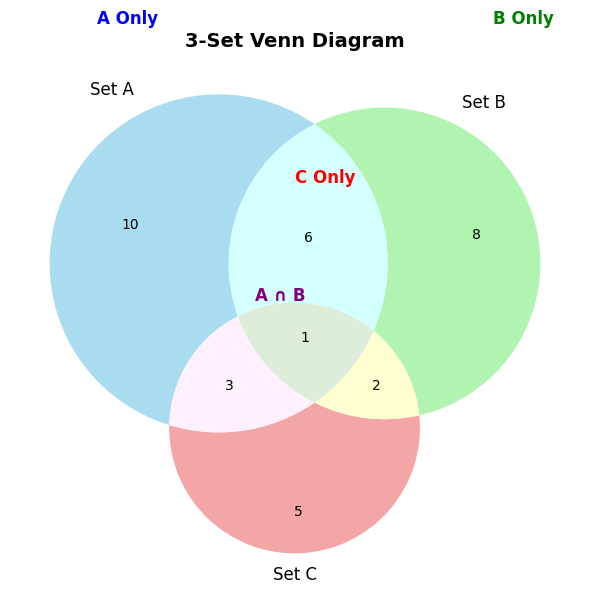

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

# Enhanced 2-set Venn Diagram
plt.figure(figsize=(6, 6))
venn2(subsets=(10, 8, 4), set_labels=('Set A', 'Set B'),
      set_colors=('skyblue', 'lightgreen'), alpha=0.7)

plt.title("2-Set Venn Diagram", fontsize=14, fontweight='bold')
plt.text(-0.5, 0.7, 'A Only', fontsize=12, color='blue', fontweight='bold')
plt.text(0.5, 0.7, 'B Only', fontsize=12, color='green', fontweight='bold')
plt.text(0, -0.2, 'A ∩ B', fontsize=12, color='purple', fontweight='bold')
plt.tight_layout()
plt.show()

# Enhanced 3-set Venn Diagram
plt.figure(figsize=(6, 6))
venn3(subsets=(10, 8, 6, 5, 3, 2, 1), set_labels=('Set A', 'Set B', 'Set C'),
      set_colors=('skyblue', 'lightgreen', 'lightcoral'), alpha=0.7)

plt.title("3-Set Venn Diagram", fontsize=14, fontweight='bold')
plt.text(-0.5, 0.7, 'A Only', fontsize=12, color='blue', fontweight='bold')
plt.text(0.5, 0.7, 'B Only', fontsize=12, color='green', fontweight='bold')
plt.text(-0.1, 0, 'A ∩ B', fontsize=12, color='purple', fontweight='bold')
plt.text(0, 0.3, 'C Only', fontsize=12, color='red', fontweight='bold')
plt.tight_layout()
plt.show()


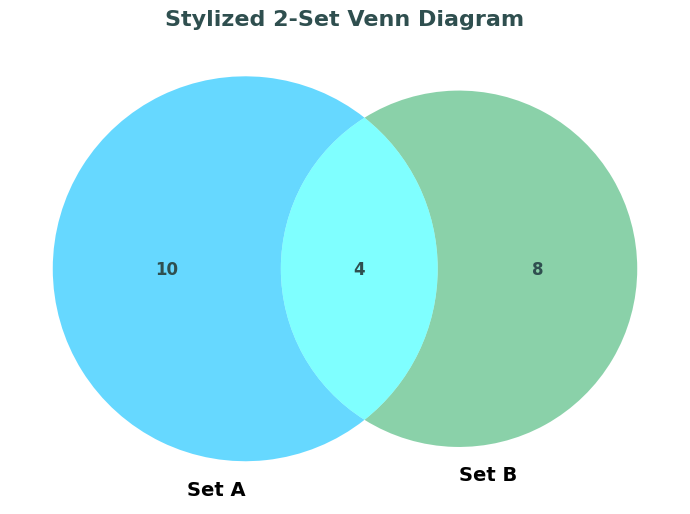

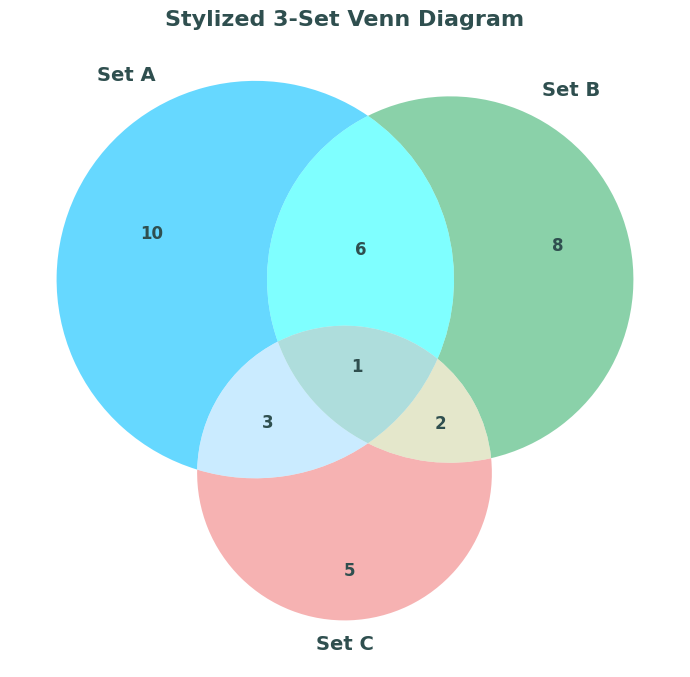

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

# Enhanced 2-set Venn Diagram
plt.figure(figsize=(7, 7))
venn = venn2(subsets=(10, 8, 4), set_labels=('Set A', 'Set B'),
             set_colors=('deepskyblue', 'mediumseagreen'), alpha=0.6)

# Customize appearance of 2-set
for idx, subset in enumerate(('10', '01', '11')):
    venn.get_label_by_id(subset).set_fontsize(12)
    venn.get_label_by_id(subset).set_fontweight('bold')
    venn.get_label_by_id(subset).set_color('darkslategray')

venn.get_label_by_id('A').set_fontsize(14)
venn.get_label_by_id('B').set_fontsize(14)
venn.get_label_by_id('A').set_fontweight('bold')
venn.get_label_by_id('B').set_fontweight('bold')

plt.title("Stylized 2-Set Venn Diagram", fontsize=16, fontweight='bold', color='darkslategray')
plt.tight_layout()
plt.show()

# Enhanced 3-set Venn Diagram
plt.figure(figsize=(7, 7))
venn = venn3(subsets=(10, 8, 6, 5, 3, 2, 1), set_labels=('Set A', 'Set B', 'Set C'),
             set_colors=('deepskyblue', 'mediumseagreen', 'lightcoral'), alpha=0.6)

# Customize appearance of 3-set
for idx, subset in enumerate(('100', '010', '001', '110', '101', '011', '111')):
    venn.get_label_by_id(subset).set_fontsize(12)
    venn.get_label_by_id(subset).set_fontweight('bold')
    venn.get_label_by_id(subset).set_color('darkslategray')

# Style for the set labels
for label_id in ['A', 'B', 'C']:
    venn.get_label_by_id(label_id).set_fontsize(14)
    venn.get_label_by_id(label_id).set_fontweight('bold')
    venn.get_label_by_id(label_id).set_color('darkslategray')

plt.title("Stylized 3-Set Venn Diagram", fontsize=16, fontweight='bold', color='darkslategray')
plt.tight_layout()
plt.show()


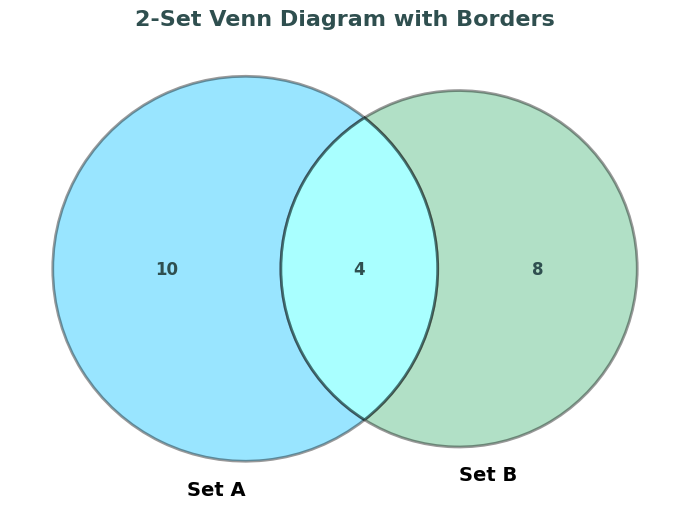

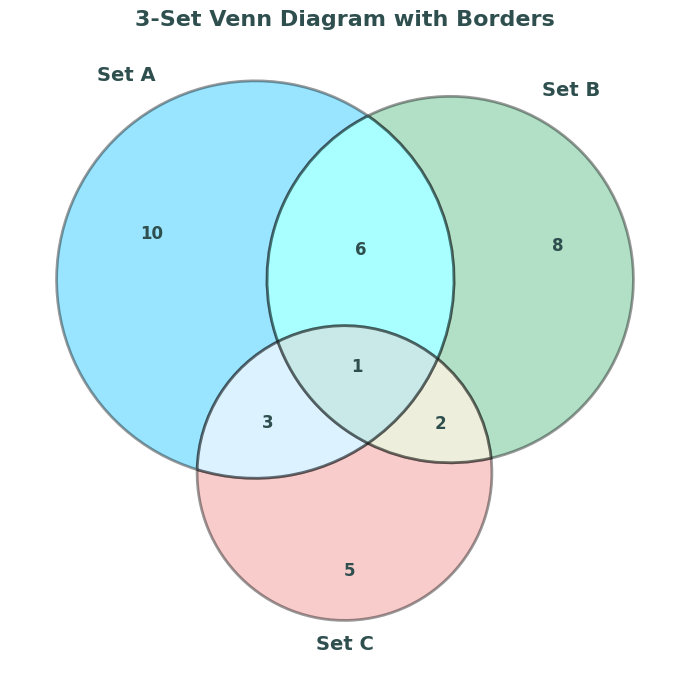

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

# Enhanced 2-set Venn Diagram
plt.figure(figsize=(7, 7))
venn = venn2(subsets=(10, 8, 4), set_labels=('Set A', 'Set B'),
             set_colors=('deepskyblue', 'mediumseagreen'), alpha=0.4)

# Add border to the circles and make them more transparent
for patch in ['10', '01', '11']:
    venn.get_patch_by_id(patch).set_edgecolor('black')  # Black border
    venn.get_patch_by_id(patch).set_linewidth(2)        # Border thickness

# Customize appearance of 2-set
for idx, subset in enumerate(('10', '01', '11')):
    venn.get_label_by_id(subset).set_fontsize(12)
    venn.get_label_by_id(subset).set_fontweight('bold')
    venn.get_label_by_id(subset).set_color('darkslategray')

venn.get_label_by_id('A').set_fontsize(14)
venn.get_label_by_id('B').set_fontsize(14)
venn.get_label_by_id('A').set_fontweight('bold')
venn.get_label_by_id('B').set_fontweight('bold')

plt.title("2-Set Venn Diagram with Borders", fontsize=16, fontweight='bold', color='darkslategray')
plt.tight_layout()
plt.show()

# Enhanced 3-set Venn Diagram
plt.figure(figsize=(7, 7))
venn = venn3(subsets=(10, 8, 6, 5, 3, 2, 1), set_labels=('Set A', 'Set B', 'Set C'),
             set_colors=('deepskyblue', 'mediumseagreen', 'lightcoral'), alpha=0.4)

# Add border to the circles and make them more transparent
for patch in ['100', '010', '001', '110', '101', '011', '111']:
    venn.get_patch_by_id(patch).set_edgecolor('black')  # Black border
    venn.get_patch_by_id(patch).set_linewidth(2)        # Border thickness

# Customize appearance of 3-set
for idx, subset in enumerate(('100', '010', '001', '110', '101', '011', '111')):
    venn.get_label_by_id(subset).set_fontsize(12)
    venn.get_label_by_id(subset).set_fontweight('bold')
    venn.get_label_by_id(subset).set_color('darkslategray')

# Style for the set labels
for label_id in ['A', 'B', 'C']:
    venn.get_label_by_id(label_id).set_fontsize(14)
    venn.get_label_by_id(label_id).set_fontweight('bold')
    venn.get_label_by_id(label_id).set_color('darkslategray')

plt.title("3-Set Venn Diagram with Borders", fontsize=16, fontweight='bold', color='darkslategray')
plt.tight_layout()
plt.show()
